In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
!ls drive/MyDrive/inceptez-22/

dogs-vs-cats.zip


In [5]:
!unzip drive/MyDrive/inceptez-22/dogs-vs-cats.zip

Archive:  drive/MyDrive/inceptez-22/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip train.zip

In [ ]:
!ls train

In [10]:
img = cv2.imread("train/cat.1913.jpg")

In [12]:
img.shape

(499, 488, 3)

In [29]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
from google.colab.patches import cv2_imshow

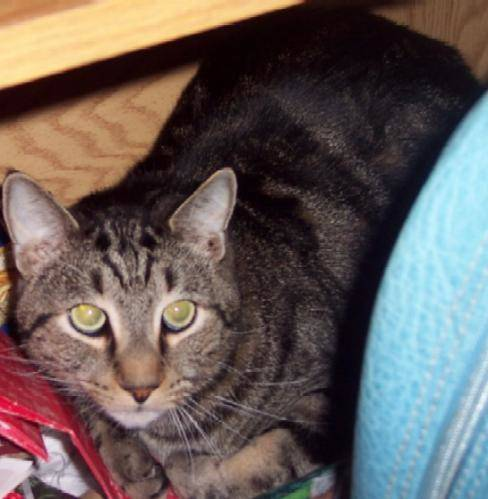

In [18]:
cv2_imshow(img)

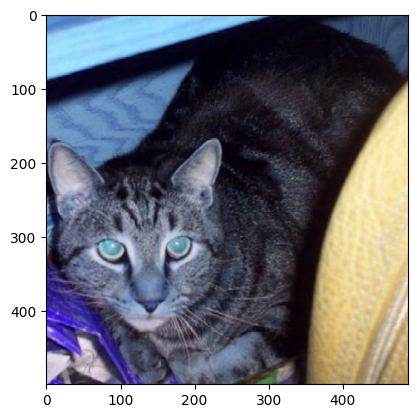

In [65]:
plt.imshow(img)

In [ ]:
#RGB -> BGR
#012
#0-2

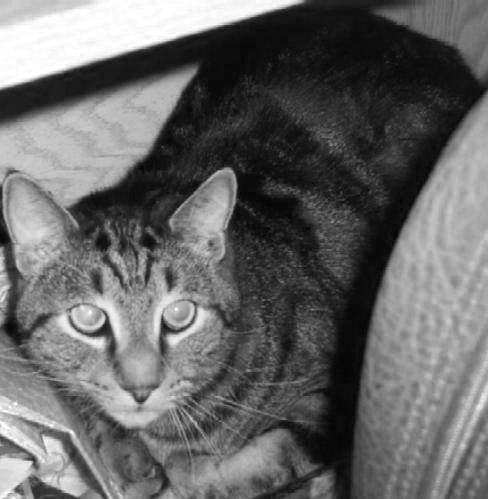

In [30]:
cv2_imshow(img_rgb[:,:,0])

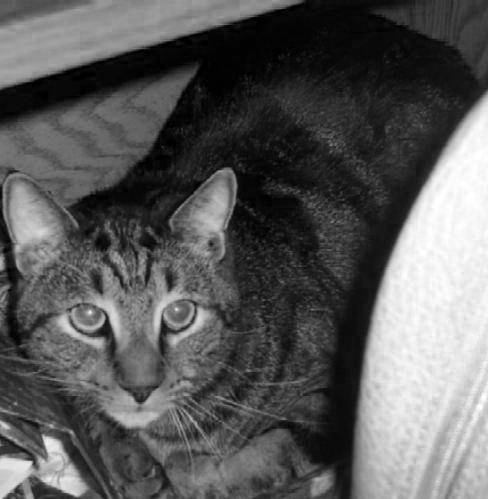

In [19]:
cv2_imshow(img[:,:,0])

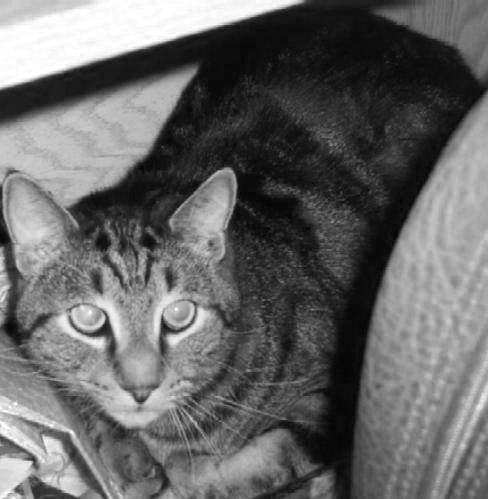

In [21]:
cv2_imshow(img[:,:,2])

In [26]:
499*488

243512

In [25]:
img_resized = cv2.resize(img,(32,32))

In [27]:
32*32

1024

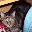

In [28]:
cv2_imshow(img_resized)

In [31]:
img_black = np.zeros((256,256,3))

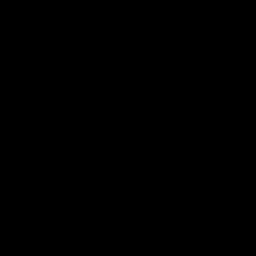

In [32]:
cv2_imshow(img_black)

In [33]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [34]:
print(neigh.predict([[1.1]]))

[0]


In [35]:
from sklearn.model_selection import train_test_split
from imutils import paths
import os

In [38]:
img_black.flatten().shape

(196608,)

In [39]:
def image_to_features(image, size= (32,32)):
  return cv2.resize(image,size).flatten()

In [40]:
train_Data = 'train/'

In [41]:
imagePaths = list(paths.list_images(train_Data))
print(imagePaths[:5])
print(len(imagePaths))

['train/dog.2046.jpg', 'train/cat.6647.jpg', 'train/cat.9923.jpg', 'train/cat.10451.jpg', 'train/dog.6172.jpg']
25000


In [42]:
imagePaths[0].split('/')[1].split('.')[0]

'dog'

In [43]:
import tqdm

In [51]:
rawImages= []
labels = []
for image_ in tqdm.tqdm(imagePaths):
  image = cv2.imread(image_)
  label = image_.split('/')[1].split('.')[0]

  pixel_values = image_to_features(image)
  rawImages.append(pixel_values)
  labels.append(label)

25000it [01:08, 365.00it/s]


In [55]:
rawImages = np.array(rawImages)
labels = np.array(labels)

In [56]:
rawImages_subset = rawImages[:2000]
labels_subset = labels[:2000]

In [57]:
(ImageTrain, ImageTest, LabelTrain, LabelTest) = train_test_split(rawImages_subset,labels_subset,test_size = 0.25,shuffle = True)

In [58]:
neighbors = [1,3,5,7,11,13]
for i in neighbors:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(ImageTrain,LabelTrain)
  acc = model.score(ImageTest,LabelTest)
  print("Raw pixel accuracy {:.2f}%".format(acc *100))

Raw pixel accuracy 56.80%
Raw pixel accuracy 54.80%
Raw pixel accuracy 57.00%
Raw pixel accuracy 56.40%
Raw pixel accuracy 57.40%
Raw pixel accuracy 56.80%


In [67]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(ImageTrain,LabelTrain)

KNeighborsClassifier(n_neighbors=11)

In [68]:
pred = model.predict(ImageTest)

In [69]:
#confusion Matrix - Metircs

In [70]:
test_plots = ImageTest[:20].reshape((20,32,32,3))

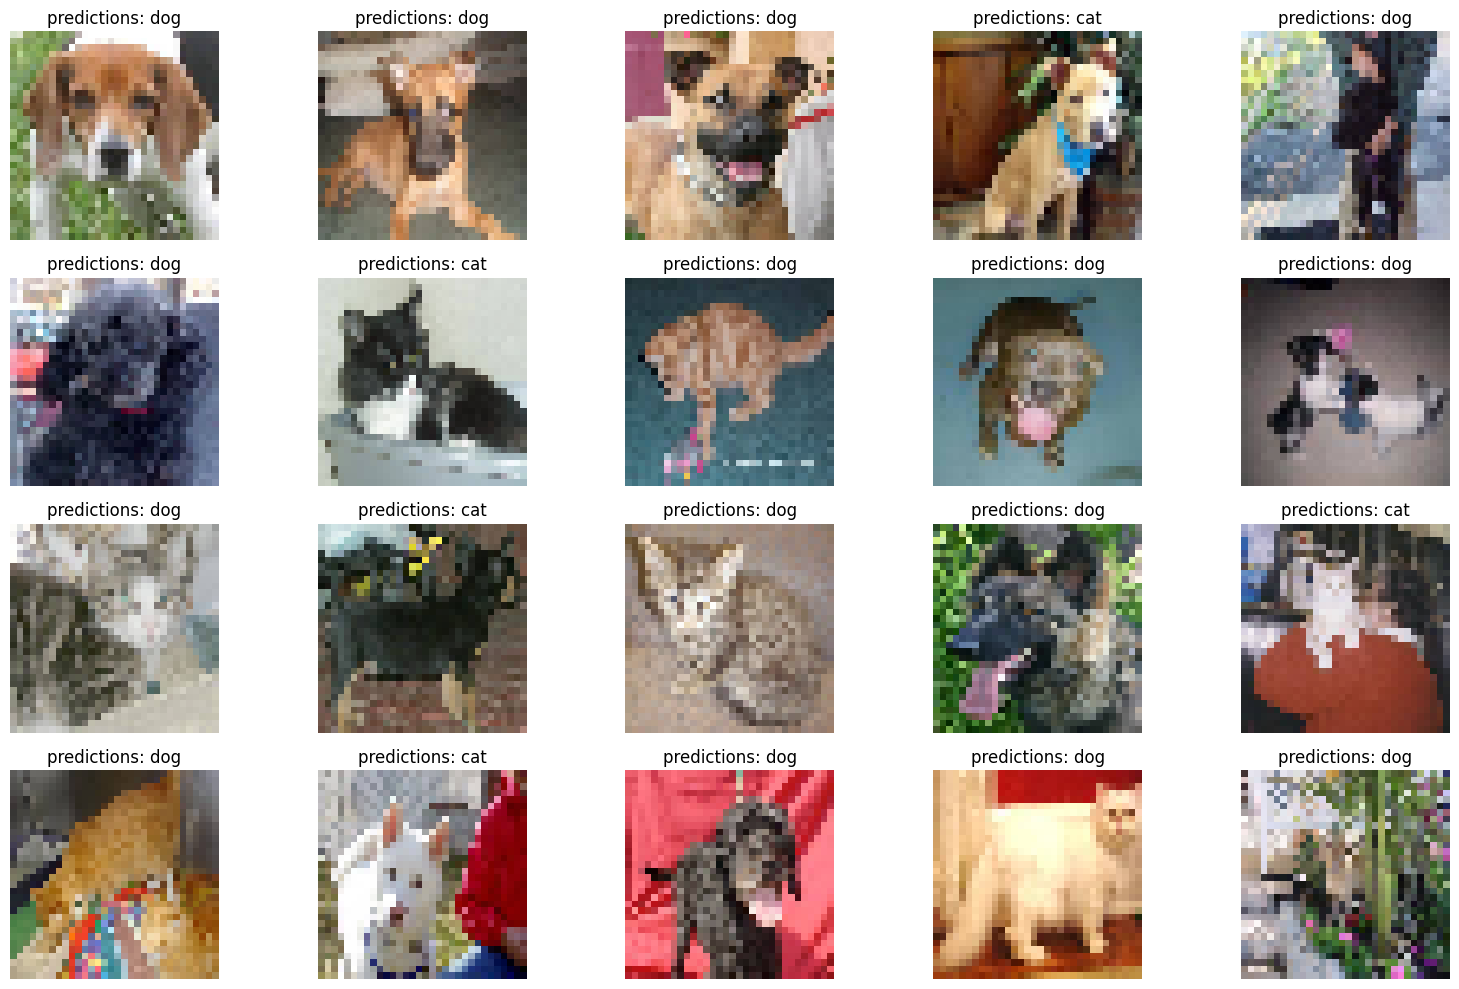

In [71]:
plt.figure(figsize = (16,10))
for i,test in enumerate(test_plots):
  plt.subplot(4,5,i+1)
  plt.imshow(cv2.cvtColor(test,cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.title("predictions: "+pred[i])

plt.tight_layout()
plt.show()

In [ ]:
#Summary!
#1. Read the data
#2. Feature Engineering - Pre-processing - Resize and Flatten!
#3. Train-Test-Split
#4. Model - Fitting & Model Selection
#5. Model - Evaluation
  #1. Quantitative Analysis - MSE, Accuracy, Confusion matrix,
  #2. Qualitative Analysis - Human Quality Assurance